<a href="https://colab.research.google.com/github/saharnazyp/AgeEstimation/blob/main/AgeEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Age estimation from facial images is one of the important challenges in computer vision, which has wide applications in security, targeted advertising, and human-machine interaction. With the advent of deep learning, methods based on neural networks have been able to provide high accuracy in this area. In this paper, the main methods of age estimation using deep learning are reviewed.

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2 as cv
import PIL
from PIL import Image

from matplotlib import pyplot as plt
import seaborn as sns

from torch.utils.data import Dataset


import sklearn
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.utils.data import Dataset , DataLoader , random_split
from torch import optim
from torch.nn import functional as F
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision import transforms

import torch.optim as optim

import tqdm
import torchmetrics as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!apt install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!unrar x "/content/drive/MyDrive/DeepLearning/Data/AgeEstimation/UTKface.rar" "/content/UTKFace/"



Streaming output truncated to the last 5000 lines.
Extracting  /content/UTKFace/UTKface/53_1_0_20170117000739940.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117155436335.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117161107736.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117163700586.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117163702203.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117163708786.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117163710642.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117163713738.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117191014323.jpg         66%  OK 
Extracting  /content/UTKFace/UTKface/53_1_0_20170117191020179.jpg         66%  OK 
Extracting  /content/UTKFace/

In [ ]:
dataset_folder= "/content/UTKFace/UTKface"

In [ ]:
os.listdir()

['.config', 'UTKFace', 'drive', 'sample_data']

In [ ]:
print(os.listdir('/content/UTKFace')[:5])


['UTKface']


# 🔶Utils

In [ ]:
class AverageMeter:
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


In [ ]:
def num_trainable_params(model):
  num = sum(p.numel() for p in model.parameters () if p.requires_grad)/le6
  return num




# **⭕EDA**
###⭐Let's explore the images in the UTK dataset!


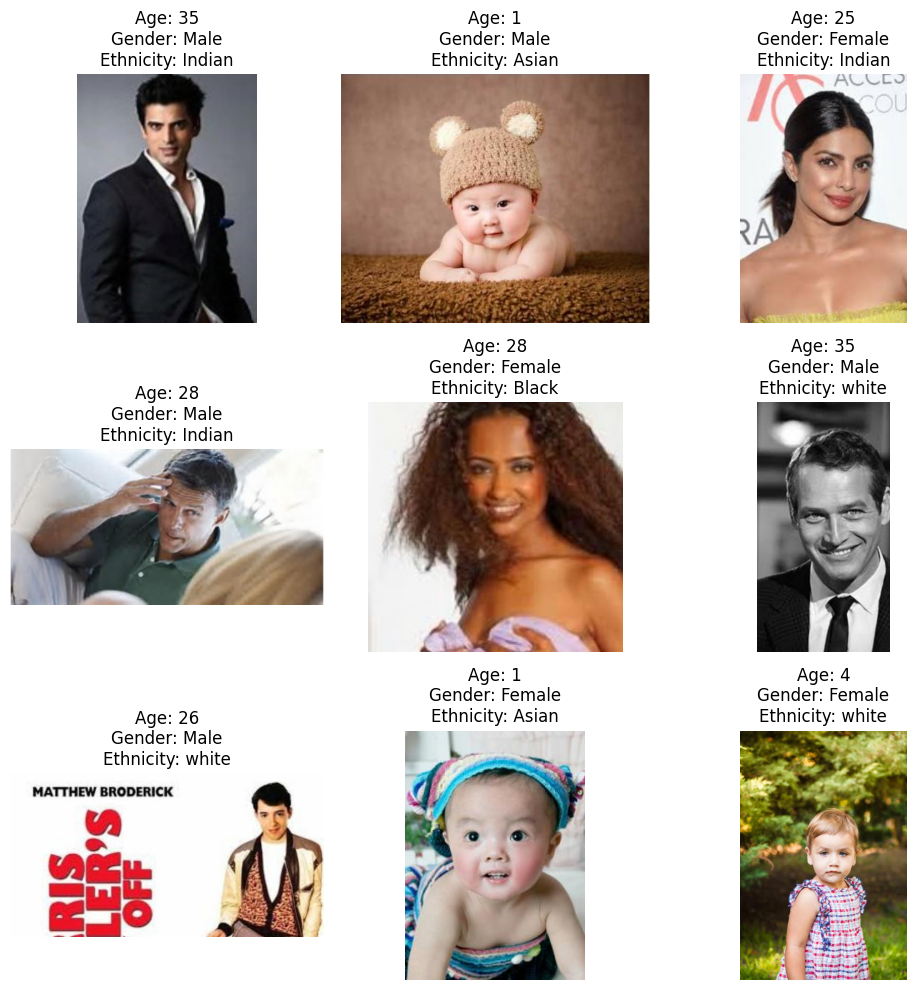

In [ ]:

# Replace with the actual path to your UTK dataset images folder
dataset_folder = r'/content/UTKFace/UTKface'
num_samples = 9

def show_random_samples(dataset_folder):
    image_files = [f for f in os.listdir(dataset_folder) if f.endswith('.jpg')]

    # Check if enough images are available
    if len(image_files) < num_samples:
        raise ValueError("Not enough images in the folder!")

    selected_image_files = random.sample(image_files, num_samples)

    plt.figure(figsize=(10,10))
    for idx, image_file in enumerate(selected_image_files, 1):
        image_path = os.path.join(dataset_folder, image_file)
        age, gender, ethnicity = image_file.split('_')[:3]

        image = Image.open(image_path)
        gender = 'Male' if int(gender) == 0 else 'Female'
        ethnicity = ['white','Black','Asian','Indian','others'][int(ethnicity)]

        plt.subplot(3, 3, idx)
        plt.imshow(image)
        plt.title(f"Age: {age}\nGender: {gender}\nEthnicity: {ethnicity}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to display random samples
show_random_samples(dataset_folder)






# **⭕CSV**
## Crate a csv file wich contains labelss


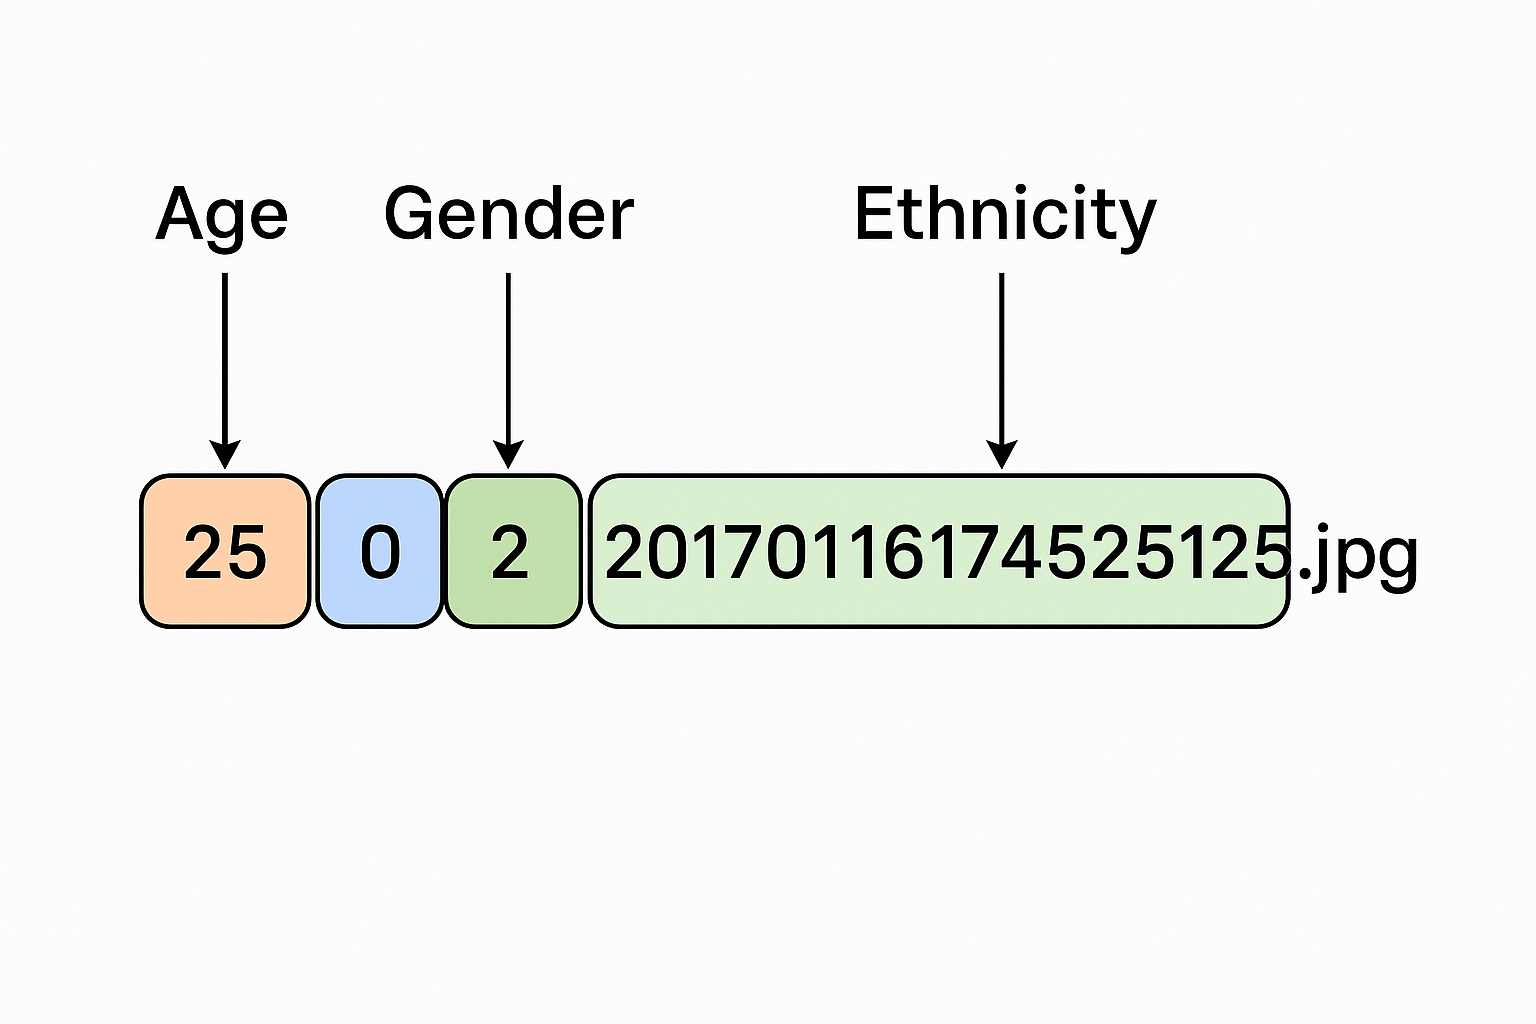

In [ ]:
#Path to the UTKFace dataset directory

dataset_dir = '/content/UTKFace/UTKface'

#Initialize lists to store data
image_names = []
ages = []
ethnicities = []
genders = []
#Iterste through files in the directory
# Loop over files
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
        parts = filename.split('_')
        #Format : [age]_[gender]_[ethnicity]_[other_info].jpg
        if len(parts) < 4:
            print("Skipped:", filename)
            continue

        try:
            age = int(parts[0])
            gender = 'Male' if int(parts[1]) == 0 else 'Female'
            ethnicity_label = int(parts[2])
            ethnicity = ['White', 'Black', 'Asian', 'Indian', 'Others'][ethnicity_label]

            if age > 80:
                continue

            image_names.append(filename)
            ages.append(age)
            ethnicities.append(ethnicity)
            genders.append(gender)
        except Exception as e:
            print("Error parsing:", filename, e)

# Create DataFrame
df = pd.DataFrame({
    'image_name': image_names,
    'age': ages,
    'ethnicity': ethnicities,
    'gender': genders
})

# Show the result
df.head()


Skipped: 39_1_20170116174525125.jpg
Skipped: 61_1_20170109142408075.jpg
Skipped: 61_3_20170109150557335.jpg
Error parsing: 53__0_20170116184028385.jpg invalid literal for int() with base 10: ''


,image_name,age,ethnicity,gender
0,1_1_0_20170109191140082.jpg,1,White,Female
1,29_0_0_20170117180855986.jpg,29,White,Male
2,26_1_2_20170117201411430.jpg,26,Asian,Female
3,50_1_0_20170109012542626.jpg,50,White,Female
4,42_0_3_20170119204447575.jpg,42,Indian,Male


In [ ]:
#save DataFrame to CSV
csv_filename = '/content/UTKFace/UTKface.csv'
df.to_csv(csv_filename,index=False)

print(f"CSV_file'{csv_filename}' created successfully.")

CSV_file'/content/UTKFace/UTKface.csv' created successfully.


In [ ]:
df.head()

,image_name,age,ethnicity,gender
0,1_1_0_20170109191140082.jpg,1,White,Female
1,29_0_0_20170117180855986.jpg,29,White,Male
2,26_1_2_20170117201411430.jpg,26,Asian,Female
3,50_1_0_20170109012542626.jpg,50,White,Female
4,42_0_3_20170119204447575.jpg,42,Indian,Male


<ipython-input-13-290fb10b2ff9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='gender', inner='stick', palette='Dark2')


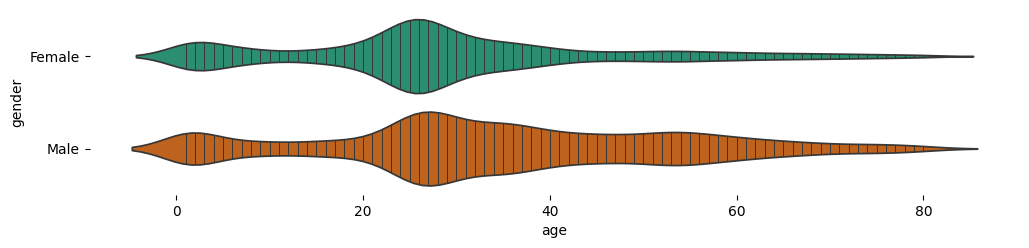

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns  # ⬅️ حتماً این خط رو اضافه کن

figsize = (12, 1.2 * len(df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


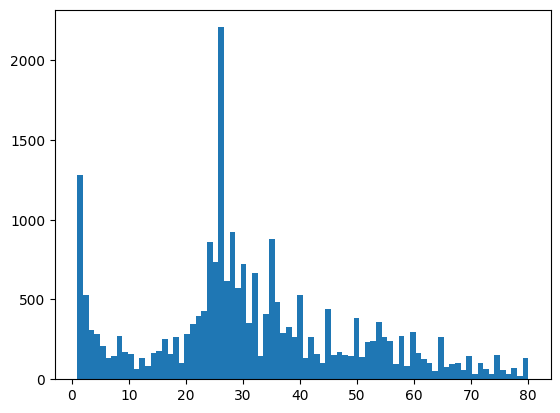

In [ ]:
plt.hist(df.age,bins=len(df.age.unique()));

In [ ]:
df.age.describe()

,age
count,23537.000000
mean,31.719973
std,18.436081
min,1.000000
25%,22.000000
50%,29.000000
75%,42.000000
max,80.000000


(array([11151., 12386.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

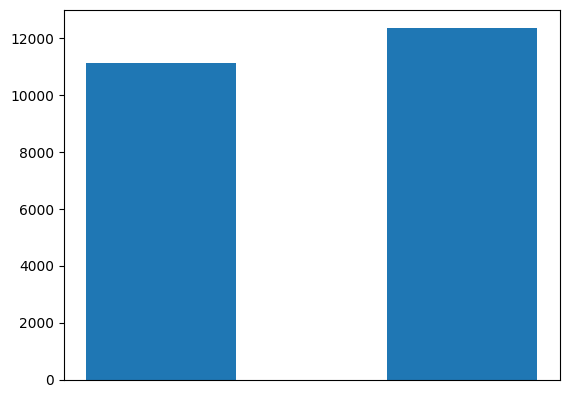

In [ ]:
plt.hist(df.gender,bins=2,rwidth=0.5)

In [ ]:
df.gender.value_counts()

,count
gender,
Male,12386
Female,11151


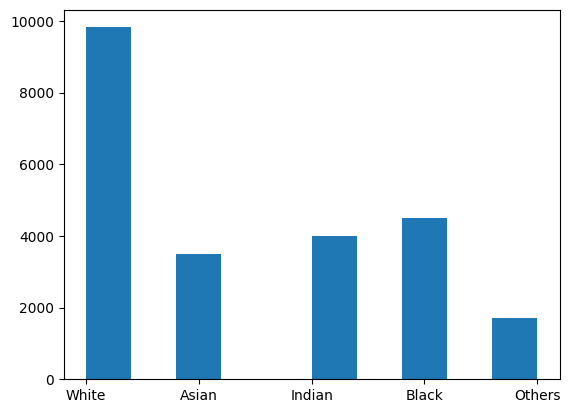

In [ ]:
plt.hist(df.ethnicity);

In [ ]:
df.ethnicity.value_counts()

,count
ethnicity,
White,9823
Black,4506
Indian,4004
Asian,3497
Others,1707


In [ ]:
pd.crosstab(index=df.gender,columns=df.ethnicity)

ethnicity,Asian,Black,Indian,Others,White
gender,,,,,
Female,1891,2194,1726,940,4400
Male,1606,2312,2278,767,5423


(array([11151., 12386.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

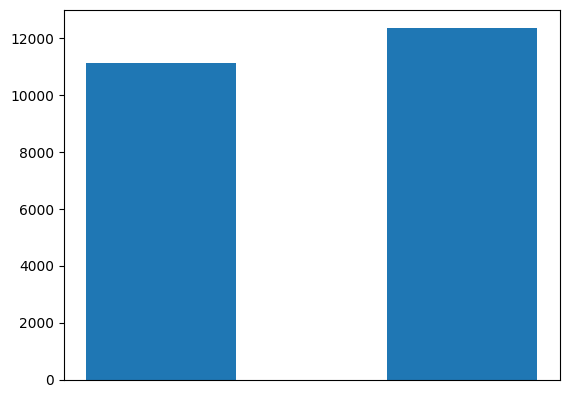

In [ ]:
plt.hist(df.gender,bins=2,rwidth=0.5)

In [ ]:
df.age[df.gender == 'Female']

,age
0,1
2,26
3,50
8,80
9,22
...,...
23521,26
23522,23
23530,24
23533,35


<ipython-input-23-fc49f5335076>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.age[df.gender == cat] for cat in df.gender.unique()],vert=False ,labels=df.gender.unique())


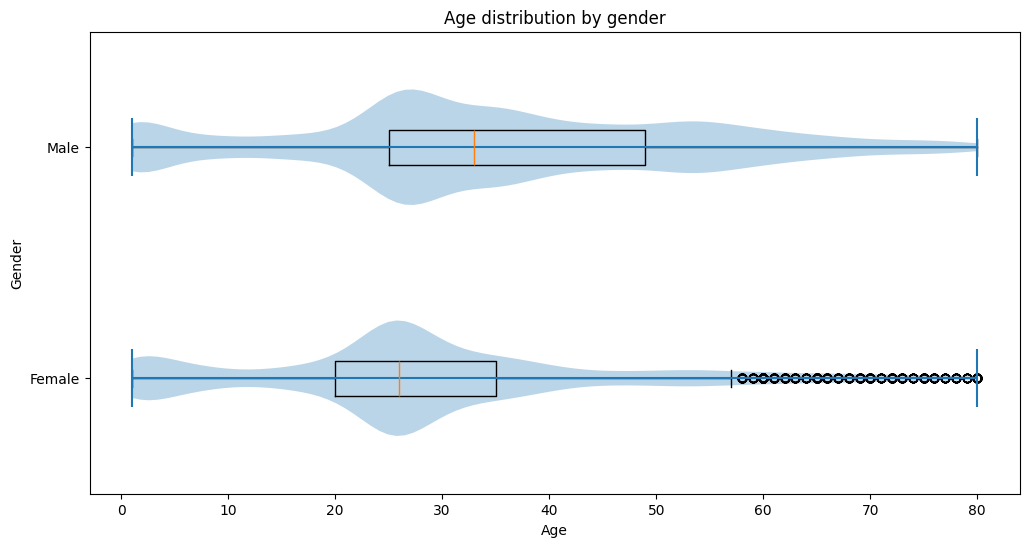

In [ ]:
plt.figure(figsize=(12,6))
plt.boxplot([df.age[df.gender == cat] for cat in df.gender.unique()],vert=False ,labels=df.gender.unique())
plt.violinplot([df.age[df.gender == cat] for cat in df.gender.unique()],vert=False );
plt.title("Age distribution by gender")
plt.xlabel("Age")
plt.ylabel("Gender")
plt.show()

<ipython-input-24-e33f8f79e3af>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.age[df.ethnicity == cat] for cat in df.ethnicity.unique()],vert=False ,labels=df.ethnicity.unique())


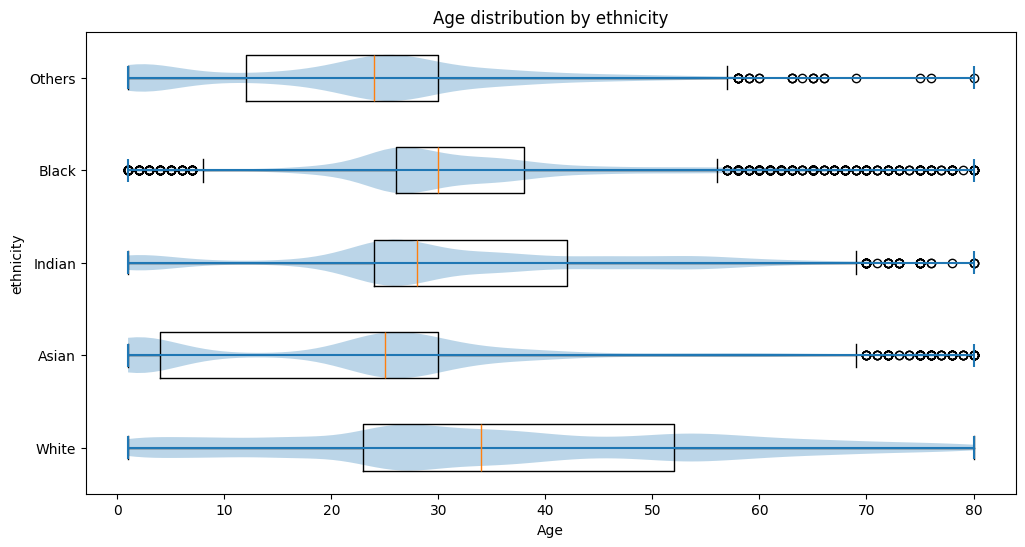

In [ ]:
plt.figure(figsize=(12,6))
plt.boxplot([df.age[df.ethnicity == cat] for cat in df.ethnicity.unique()],vert=False ,labels=df.ethnicity.unique())
plt.violinplot([df.age[df.ethnicity == cat] for cat in df.ethnicity.unique()],vert=False );
plt.title("Age distribution by ethnicity")
plt.xlabel("Age")
plt.ylabel("ethnicity")
plt.show()

# ⭐ **split Dataset**


In [ ]:
df_train, temp = train_test_split(df,test_size=0.3,stratify = df.age , random_state =72)

df_train.shape, temp.shape

((16475, 4), (7062, 4))

In [ ]:
df_test, df_valid = train_test_split(temp,test_size=0.5,stratify =temp.age , random_state =72)
df_train.shape, df_test.shape ,df_valid.shape

((16475, 4), (3531, 4), (3531, 4))

In [ ]:
df_train.head()

,image_name,age,ethnicity,gender
20250,25_1_0_20170116002134414.jpg,25,White,Female
16797,13_1_0_20170109204117086.jpg,13,White,Female
19484,19_0_0_20170103201406775.jpg,19,White,Male
22899,45_0_3_20170119184153479.jpg,45,Indian,Male
2986,45_1_1_20170117164716460.jpg,45,Black,Female


Text(0.5, 1.0, 'Test')

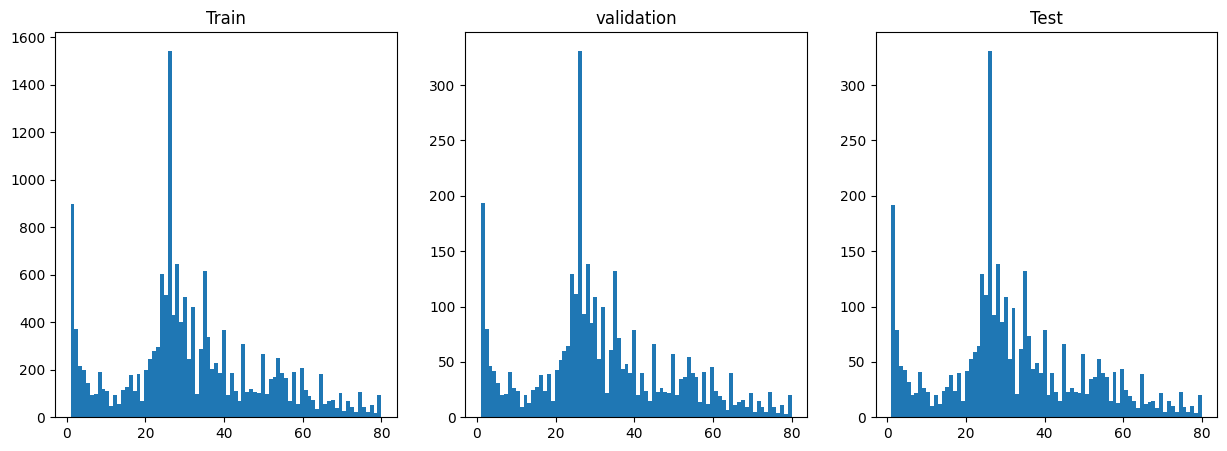

In [ ]:
fig,axes = plt.subplots(1,3,figsize =(15,5))

axes[0].hist(df_train.age , bins = len (df_train.age.unique()));axes[0].set_title('Train')
axes[1].hist(df_valid.age , bins = len (df_train.age.unique()));axes[1].set_title('validation')
axes[2].hist(df_test.age , bins = len (df_train.age.unique()));axes[2].set_title('Test')

In [ ]:
df_train.to_csv('/content/train_set.csv',index=False)
df_valid.to_csv('/content/valid_set.csv',index=False)
df_test.to_csv('/content/test_set.csv',index=False)

print('All CSV files created successfully')

All CSV files created successfully


# 🟢  Define transformation

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize ((128,128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2,hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])

])
train_transforms

Compose(
    Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
# Transformations for validation and test sets (no augmentation)
test_valid_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# 🟡 custom dataset

In [ ]:


class UTKDataset(Dataset):
    def __init__(self, root_dir, csv_file, transform=None):  # ✅ fixed typo from __int__ to __init__
        self.root_dir = root_dir
        self.csv_file = csv_file
        self.transform = transform
        self.data = pd.read_csv(csv_file)
        self.gender_dict = {'Male': 0, 'Female': 1}
        self.ethnicity_dict = {'White': 0, 'Black': 1, 'Asian': 2, 'Indian': 3, 'Others': 4}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx, :]
        img_name = sample['image_name']
        img = Image.open(os.path.join(self.root_dir, img_name)).convert('RGB')  # ensure 3 channels

        age = torch.tensor([sample['age']], dtype=torch.float32)
        gender = torch.tensor(self.gender_dict[sample['gender']], dtype=torch.int64)
        ethnicity = torch.tensor(self.ethnicity_dict[sample['ethnicity']], dtype=torch.int64)

        if self.transform:
            img = self.transform(img)

        return img, age, gender, ethnicity  # ✅ fixed return statement



In [ ]:
# Define test_transform or any transform you'd like
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize to match model input (e.g., for ResNet)
    transforms.ToTensor(),          # convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # normalize RGB channels
])

In [ ]:
temp_dataset = UTKDataset(
    root_dir='/content/UTKFace/UTKface/',
    csv_file='/content/valid_set.csv',
    transform=test_transform
)


In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [ ]:
temp_dataset = UTKDataset(root_dir = '/content/UTKFace/UTKface/',
                          csv_file = '/content/valid_set.csv',
                          transform = test_transform)

temp_dataset.data, len(temp_dataset)
temp_dataset[0][1]

tensor([47.])

In [ ]:
dataset_dir = '/content/UTKFace/UTKface/'     #Dataset directory path

train_set = UTKDataset(root_dir = dataset_dir,csv_file='/content/train_set.csv'
,transform =train_transform)
valid_set = UTKDataset(root_dir = dataset_dir,csv_file='/content/valid_set.csv',transform =test_transform)
test_set = UTKDataset(root_dir = dataset_dir,csv_file='/content/test_set.csv',transform =test_transform)

In [ ]:
idx = torch.randint(len(train_set), size=(1,))
print("Random index:", idx)
print(idx)
img, age, _,_ = train_set[idx.item()]
print(age.item(),
img)

Random index: tensor([6242])
tensor([6242])
35.0 tensor([[[0.2549, 0.2549, 0.2588,  ..., 0.3137, 0.3137, 0.3137],
         [0.2549, 0.2549, 0.2588,  ..., 0.3137, 0.3137, 0.3137],
         [0.2549, 0.2549, 0.2588,  ..., 0.3137, 0.3137, 0.3137],
         ...,
         [0.4039, 0.4000, 0.3961,  ..., 0.4314, 0.4392, 0.4431],
         [0.4078, 0.4000, 0.4000,  ..., 0.4353, 0.4392, 0.4471],
         [0.4118, 0.3961, 0.4000,  ..., 0.4392, 0.4431, 0.4471]],

        [[0.2353, 0.2353, 0.2392,  ..., 0.2980, 0.2980, 0.2980],
         [0.2353, 0.2353, 0.2392,  ..., 0.2980, 0.2980, 0.2980],
         [0.2353, 0.2353, 0.2392,  ..., 0.2980, 0.2980, 0.2980],
         ...,
         [0.4000, 0.3961, 0.3922,  ..., 0.4353, 0.4431, 0.4471],
         [0.4039, 0.3961, 0.3961,  ..., 0.4392, 0.4431, 0.4510],
         [0.4078, 0.3922, 0.3961,  ..., 0.4431, 0.4471, 0.4510]],

        [[0.2196, 0.2196, 0.2235,  ..., 0.2863, 0.2863, 0.2863],
         [0.2196, 0.2196, 0.2235,  ..., 0.2863, 0.2863, 0.2863],
         

In [ ]:
train_loader = DataLoader(train_set,batch_size=128,shuffle=True)
test_loader = DataLoader(test_set,batch_size=256,shuffle=True)
valid_loader = DataLoader(valid_set,batch_size=256,shuffle=True)

In [ ]:
train_iter = iter (train_loader)
train_iter

In [ ]:
imgs, age, _,_ = next(train_iter)
imgs.shape, age.shape

(torch.Size([128, 3, 128, 128]), torch.Size([128, 1]))

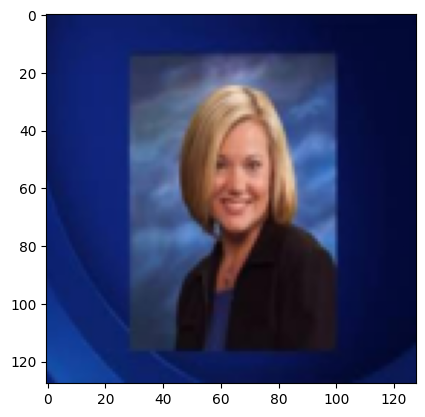

In [ ]:
plt.imshow(imgs[10].permute(1,2,0))

In [ ]:
model=models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
model.fc = nn.Linear(in_features = 2048, out_features =1 , bias = True)
model

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 83.9MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model(imgs).shape

torch.Size([128, 1])

In [ ]:
class AgeEstimationModel(nn.Module):


  def __init__(self):
    super().__init__()
    self.model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    self.model.fc = nn.Linear(in_features = 2048, out_features =1 , bias = True)

  def forward(self,x):
    y = self.model(x)
    return y

In [ ]:
model = AgeEstimationModel()
model(imgs).shape

torch.Size([128, 1])

# 🔵   Configurations

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)


In [ ]:
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9, weight_decay=1e-4)

optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.02
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)

In [ ]:
metric = tm.MeanAbsoluteError()
metric

MeanAbsoluteError()

In [ ]:
metric(torch.tensor(6.),torch.tensor(4.))


tensor(2.)

In [ ]:
metric.compute()

tensor(2.)

# ⚪ Train & Validation

In [ ]:
len(train_loader)


129

In [ ]:
epochs = 1
for epoch in range(epochs):
  for inputs,targets,_ ,_  in train_loader:
    outputs = model(inputs)
    loss = loss_fn(outputs,targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(loss)



    # print(inputs.shape,targets.shape)



tensor(30.9593, grad_fn=<MeanBackward0>)
tensor(34.8333, grad_fn=<MeanBackward0>)
tensor(30.6209, grad_fn=<MeanBackward0>)
tensor(27.6237, grad_fn=<MeanBackward0>)
tensor(26.4500, grad_fn=<MeanBackward0>)
tensor(24.4944, grad_fn=<MeanBackward0>)
tensor(17.8090, grad_fn=<MeanBackward0>)
tensor(13.4290, grad_fn=<MeanBackward0>)
tensor(17.7844, grad_fn=<MeanBackward0>)
tensor(15.7069, grad_fn=<MeanBackward0>)
tensor(13.3693, grad_fn=<MeanBackward0>)
tensor(13.6015, grad_fn=<MeanBackward0>)
tensor(12.2163, grad_fn=<MeanBackward0>)
tensor(15.5792, grad_fn=<MeanBackward0>)
tensor(11.8971, grad_fn=<MeanBackward0>)
tensor(13.5394, grad_fn=<MeanBackward0>)
tensor(12.4000, grad_fn=<MeanBackward0>)
tensor(11.7131, grad_fn=<MeanBackward0>)
tensor(11.1892, grad_fn=<MeanBackward0>)
tensor(12.2556, grad_fn=<MeanBackward0>)
tensor(12.2690, grad_fn=<MeanBackward0>)
tensor(14.5498, grad_fn=<MeanBackward0>)
tensor(11.0711, grad_fn=<MeanBackward0>)
tensor(12.3350, grad_fn=<MeanBackward0>)
tensor(15.1536, 

In [ ]:
with tqdm.tqdm(range(1000000), colour='green') as aa:
    for a in aa:
        b = np.exp(a / 1000000)

100%|██████████| 1000000/1000000 [00:01<00:00, 793977.87it/s]


In [ ]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, metric, epoch=None):
  model.train()
  loss_train = AverageMeter()
  metric.reset()

  with tqdm.tqdm(train_loader, unit='batch',colour='green') as tepoch:
    for inputs, targets,__,__ in tepoch:
      if epoch:
        tepoch.set_description(f'Epoch {epoch}')

      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)

      loss = loss_fn(outputs, targets)

      loss.backward()

      optimizer.step()
      optimizer.zero_grad()

      loss_train.update(loss.item(), n=len(targets))
      metric.update(outputs, targets)

      tepoch.set_postfix(loss=loss_train.avg, metric=metric.compute().item())

  return model, loss_train.avg, metric.compute().item()

In [ ]:
train_one_epoch(model , train_loader, loss_fn, optimizer, metric, epoch=1)

Epoch 1: 100%|██████████| 129/129 [1:21:41<00:00, 37.99s/batch, loss=9.13, metric=9.13]


(AgeEstimationModel(
   (model): ResNet(
     (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
     (layer1): Sequential(
       (0): Bottleneck(
         (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
         (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (relu): ReLU(inplace=True)
         (downsample

**evaluattion**

In [ ]:
model.eval()
with torch.inference_mode():
  for inputs,targets in test loader:
  outputs = model(inputs)
  loss = loss_fn(outputs,targets)
  metric(outputs,targets)




In [ ]:
def evaluate (model,test_loader , lass_fn,metric):
  model.eval()
  loss_eval = AvrageMeter()
with torch.inference_mode():
  for inputs,targets in test loader:
  outputs = model(inputs)

  loss = loss_fn(outputs,targets)
  loss_eval.update(loss.item())

  metric(outputs,targets)


return loss.avg,metric.compute().item()